<a href="https://colab.research.google.com/github/kmmsinan-creator/neuralnetworking/blob/main/NNDL_CheckPoint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn**

# **1.Data Exploratory**

In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.graph_objects import Sankey
from math import pi
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, validation_curve, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [3]:
df.shape

(5630, 20)

# **1.1 Handling Duplicates & Missing Values**

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [7]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:')
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [8]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [9]:
# Filling numerical columns with the mean
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                  'OrderCount', 'DaySinceLastOrder']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Filling categorical columns with the most frequent value
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [10]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [11]:
df.sample(10)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
2441       52442      0    13.0         Mobile Phone         2   
3707       53708      0     1.0                Phone         1   
3589       53590      0    23.0         Mobile Phone         1   
1580       51581      0    16.0         Mobile Phone         3   
2254       52255      0     0.0                Phone         1   
4607       54608      0     9.0         Mobile Phone         3   
4467       54468      0    12.0         Mobile Phone         1   
3877       53878      0    12.0             Computer         1   
3515       53516      0     3.0         Mobile Phone         1   
5268       55269      0     9.0                Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
2441             12.0          Credit Card    Male        2.000000   
3707             18.0           Debit Card    Male        4.000000   
3589             11.0          Credit Card    Male        3.000000   
1580             22.0             E wallet  Female        3.000000   
2254             31.0           Debit Card  Female        2.931535   
4607              7.0             E wallet    Male        3.000000   
4467             32.0           Debit Card  Female        3.000000   
3877              7.0           Debit Card    Male        3.000000   
3515             15.0          Credit Card    Male        4.000000   
5268              8.0          Credit Card    Male        4.000000   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
2441                         3             Grocery                  1   
3707                         4        Mobile Phone                  5   
3589                         5              Others                  3   
1580                         3             Grocery                  1   
2254                         1              Mobile                  1   
4607                         4  Laptop & Accessory                  3   
4467                         5             Fashion                  4   
3877                         4  Laptop & Accessory                  1   
3515                         5  Laptop & Accessory                  2   
5268                         5        Mobile Phone                  5   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
2441        Single                2         1                    21.000000   
3707      Divorced                2         0                    15.000000   
3589      Divorced                4         0                    15.707922   
1580       Married                6         1                    22.000000   
2254        Single                2         1                    12.000000   
4607       Married               11         0                    12.000000   
4467       Married                5         0                    18.000000   
3877       Married                9         0                    16.000000   
3515      Divorced                3         1                    14.000000   
5268        Single                3         0                    20.000000   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
2441    1.751023    7.000000                7.0          264.37  
3707    2.000000    2.000000                5.0          145.99  
3589    1.000000    2.000000                1.0          312.11  
1580    0.000000    3.008004                9.0          260.64  
2254    0.000000    1.000000                1.0          129.94  
4607    1.000000    7.000000               10.0          172.17  
4467    1.000000    3.008004                2.0          245.61  
3877    3.000000    3.000000               10.0          172.35  
3515    1.000000    2.000000                3.0          175.56  
5268    2.000000    2.000000                3.0          149.50

# **1.2 Map binary values to meaningful labels**

In [12]:
# Map binary values to meaningful labels
df['Churn'] = df['Churn'].map({1: 'Churned', 0: 'Not Churned'})
df['Complain'] = df['Complain'].map({1: 'Complain', 0: 'No Complain'})

In [13]:
df['CityTier'] = df['CityTier'].map({1: 'Tier 1 - Metropolitan',
                                     2: 'Tier 2 - Moderate Urban',
                                     3: 'Tier 3 - Rural/Small Town'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [15]:
df.drop(['CustomerID'],axis=1, inplace=True)

## **1.3 Data Description**

In [16]:
df.describe().transpose()

count        mean        std   min     25%  \
Tenure                       5630.0   10.189899   8.354164   0.0    3.00   
WarehouseToHome              5630.0   15.639896   8.339095   5.0    9.00   
HourSpendOnApp               5630.0    2.931535   0.705384   0.0    2.00   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.00   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
OrderAmountHikeFromlastYear  5630.0   15.707922   3.587926  11.0   13.00   
CouponUsed                   5630.0    1.751023   1.851038   0.0    1.00   
OrderCount                   5630.0    3.008004   2.871521   1.0    1.00   
DaySinceLastOrder            5630.0    4.543491   3.553382   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%         75%     max  
Tenure                         9.00   15.000000   61.00  
WarehouseToHome               14.00   20.000000  127.00  
HourSpendOnApp                 3.00    3.000000    5.00  
NumberOfDeviceRegistered       4.00    4.000000    6.00  
SatisfactionScore              3.00    4.000000    5.00  
NumberOfAddress                3.00    6.000000   22.00  
OrderAmountHikeFromlastYear   15.00   18.000000   26.00  
CouponUsed                     1.00    2.000000   16.00  
OrderCount                     2.00    3.008004   16.00  
DaySinceLastOrder              4.00    7.000000   46.00  
CashbackAmount               163.28  196.392500  324.99

In [17]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

# **2.Data Analysis & Visualizations**

# **2.1.Basic Visualizations**

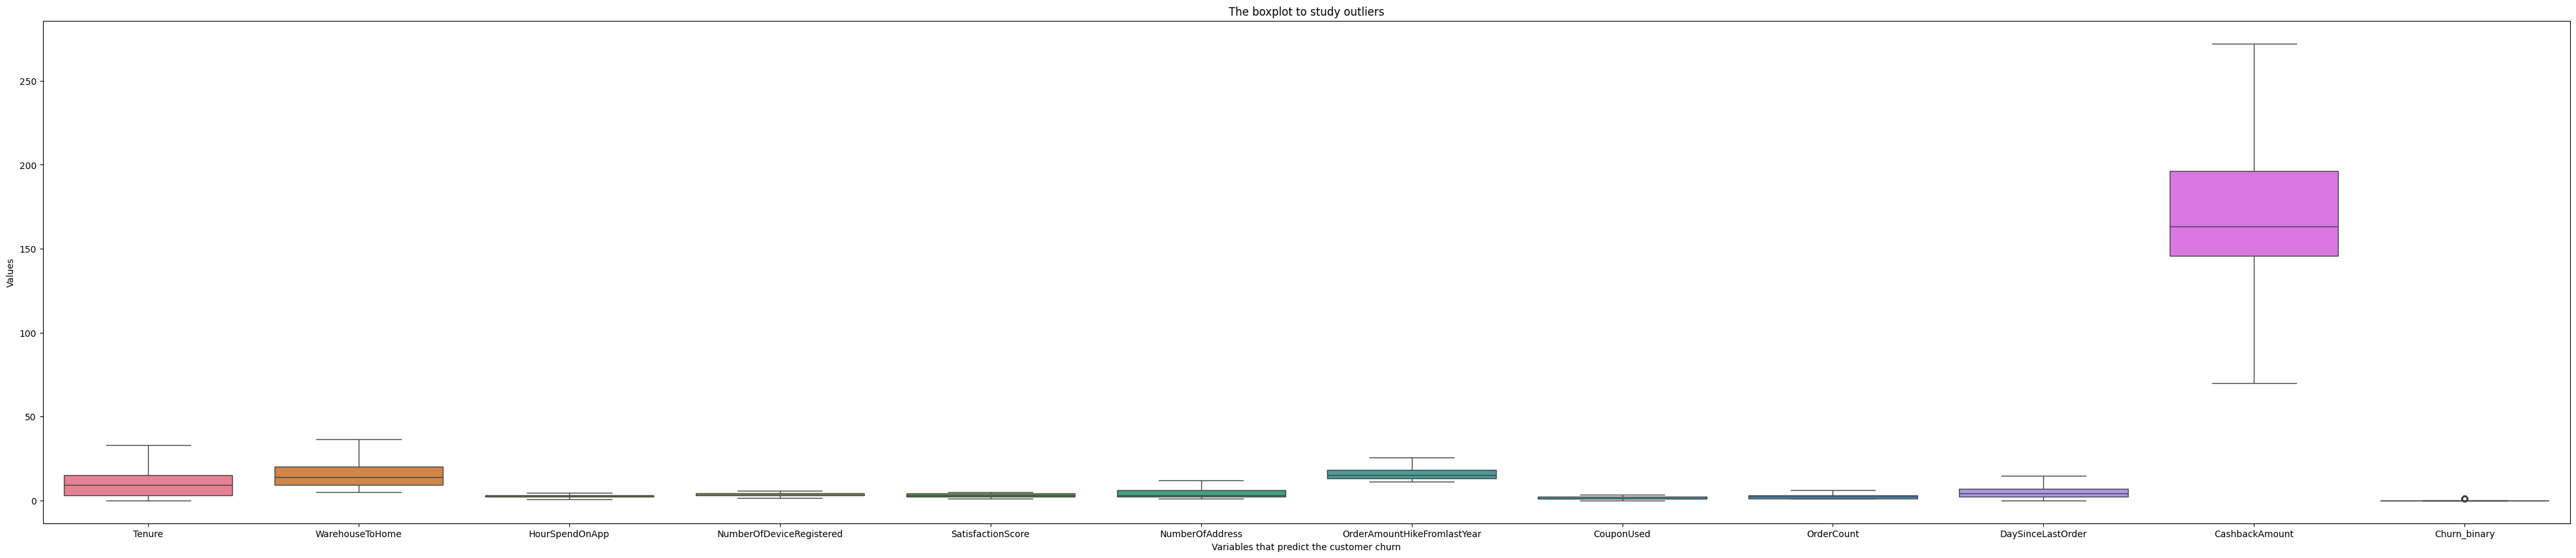

In [66]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [20]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

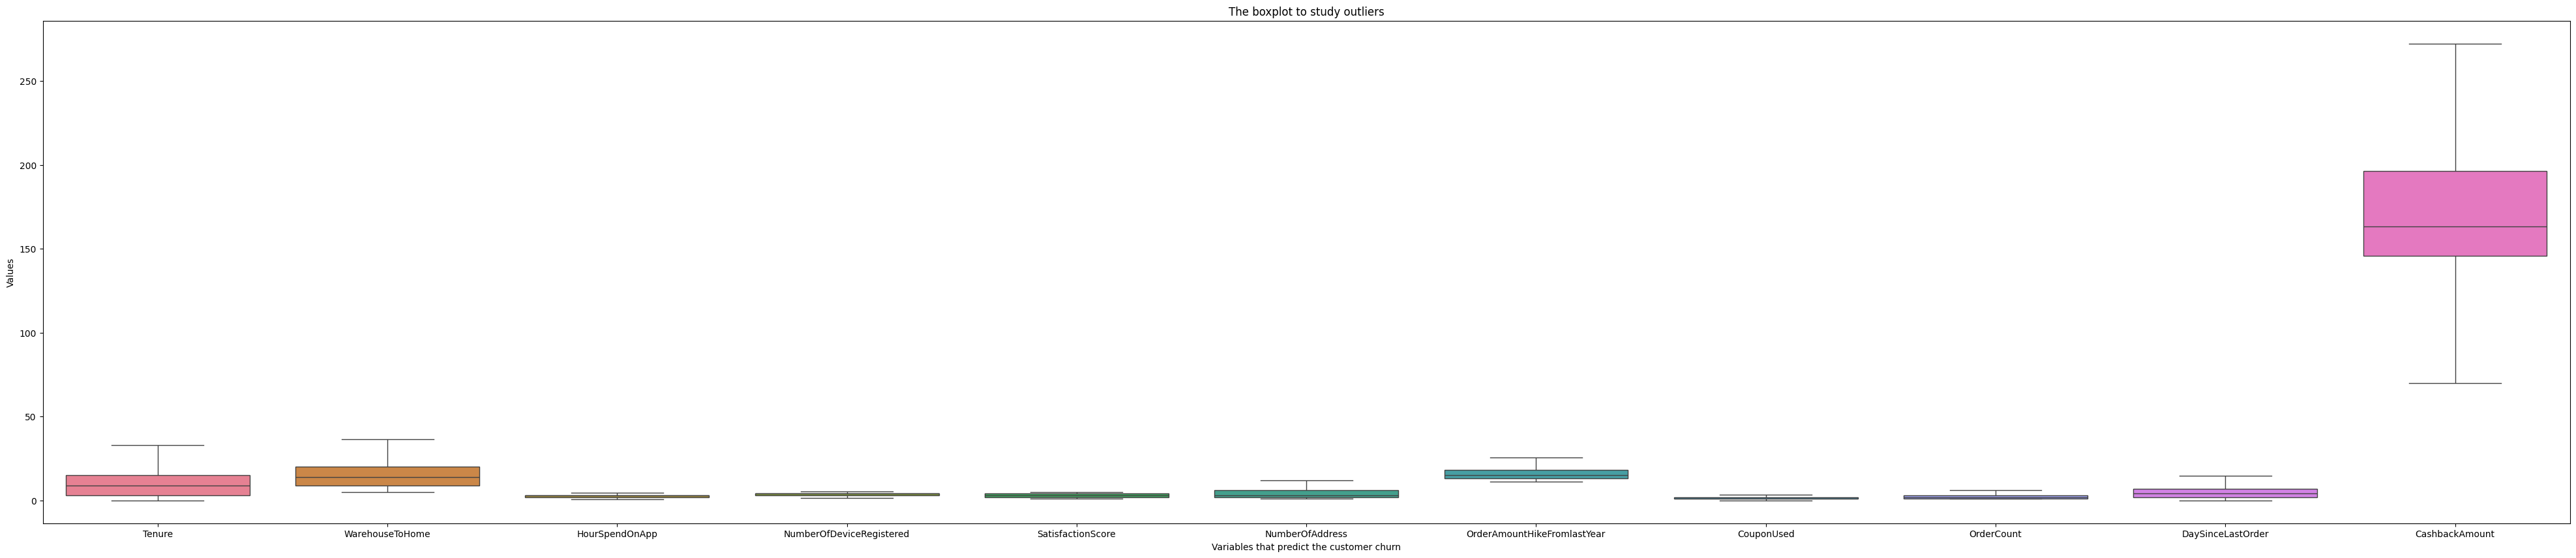

In [21]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')
plt.show()

# **2.2.Distribution plots**

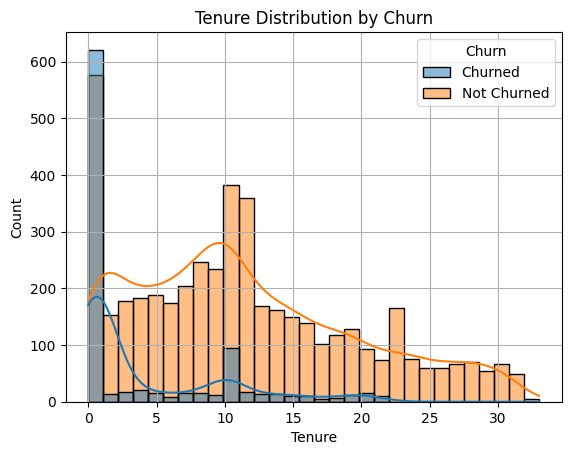

In [22]:
# Histogram: Tenure distribution by Churn
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, bins=30)
plt.title("Tenure Distribution by Churn")
plt.grid(True)
plt.show()


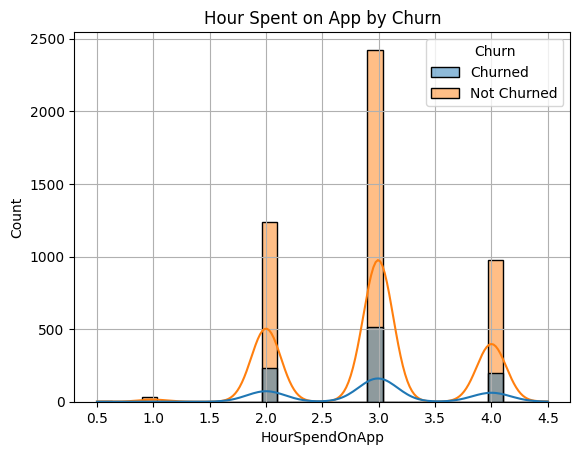

In [23]:
# Histogram: HourSpendOnApp distribution by Churn
sns.histplot(data=df, x='HourSpendOnApp', hue='Churn', kde=True, bins=30)
plt.title("Hour Spent on App by Churn")
plt.grid(True)
plt.show()


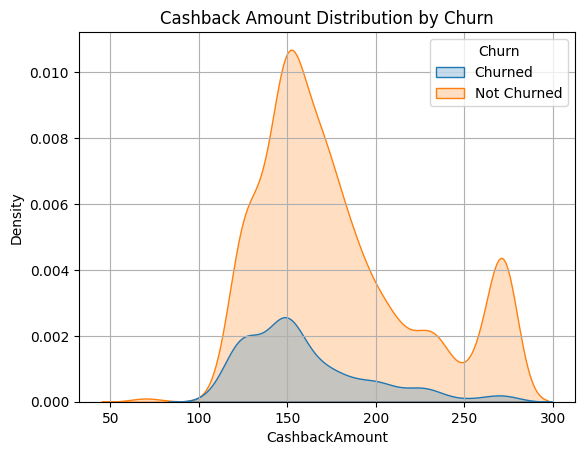

In [24]:
# Density plot for CashbackAmount
sns.kdeplot(data=df, x='CashbackAmount', hue='Churn', shade=True)
plt.title("Cashback Amount Distribution by Churn")
plt.grid(True)
plt.show()

# **2.3 Comparison Plots**

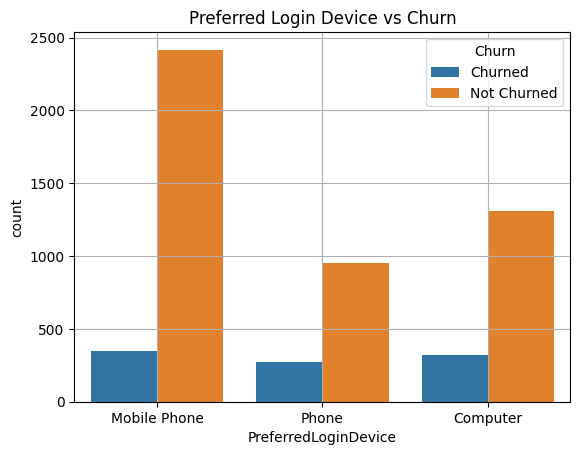

In [25]:
# Bar plot: Churn vs PreferredLoginDevice
sns.countplot(data=df, x='PreferredLoginDevice', hue='Churn')
plt.title("Preferred Login Device vs Churn")
plt.grid(True)
plt.show()

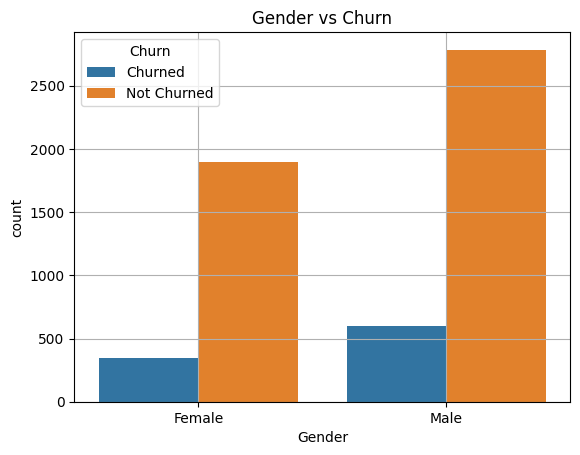

In [26]:
# Bar plot: Churn vs Gender
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title("Gender vs Churn")
plt.grid(True)
plt.show()

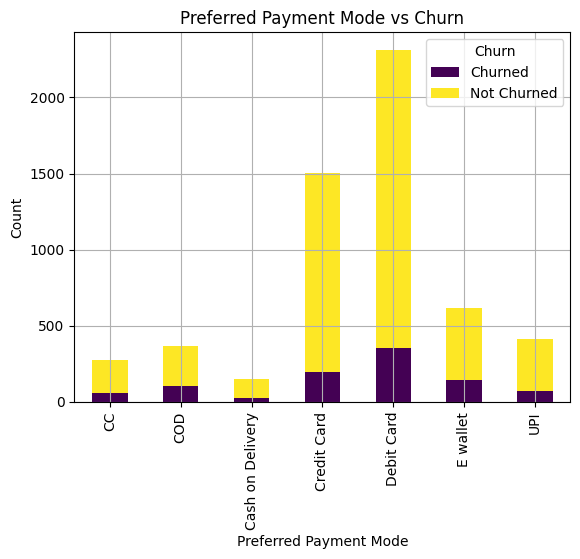

In [27]:
# Stacked bar plot: Churn vs PreferredPaymentMode
crosstab = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])
crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Preferred Payment Mode vs Churn")
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# **2.4 Realtionship Plots**

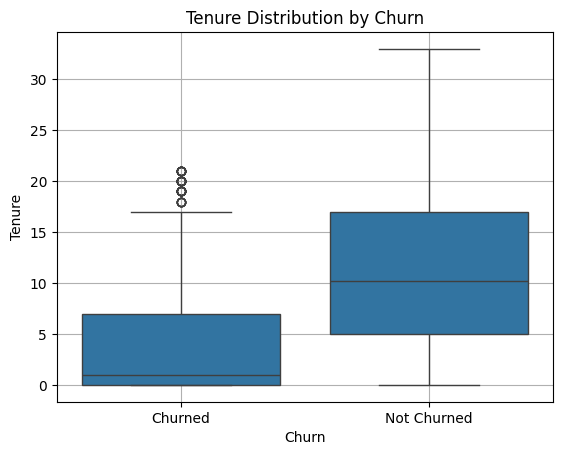

In [28]:
# Box plot: Tenure grouped by Churn
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title("Tenure Distribution by Churn")
plt.grid(True)
plt.show()

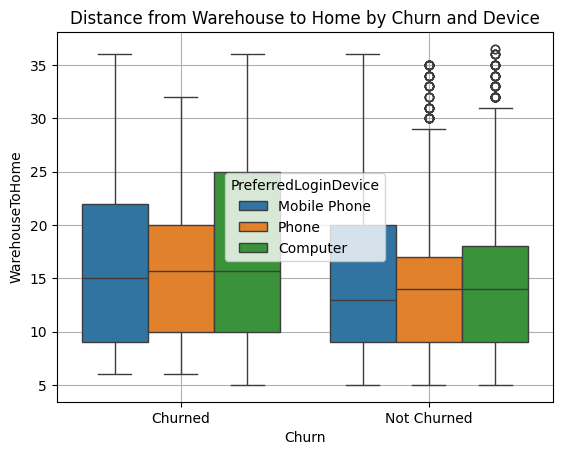

In [29]:
# Box plot: WarehouseToHome by Churn and PreferredLoginDevice
sns.boxplot(data=df, x='Churn', y='WarehouseToHome', hue='PreferredLoginDevice')
plt.title("Distance from Warehouse to Home by Churn and Device")
plt.grid(True)
plt.show()

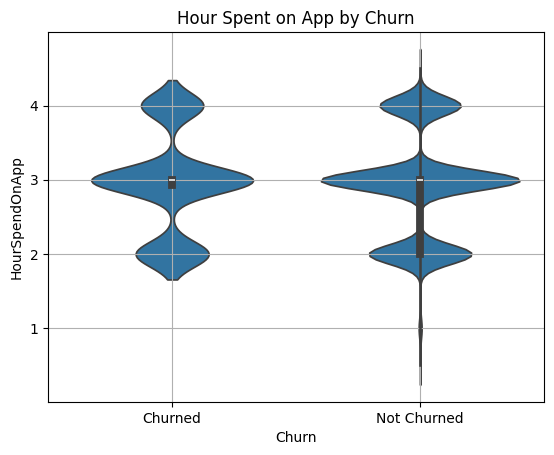

In [30]:
# Violin plot: HourSpendOnApp by Churn
sns.violinplot(data=df, x='Churn', y='HourSpendOnApp')
plt.title("Hour Spent on App by Churn")
plt.grid(True)
plt.show()

# **2.5 Aggregated Insights**

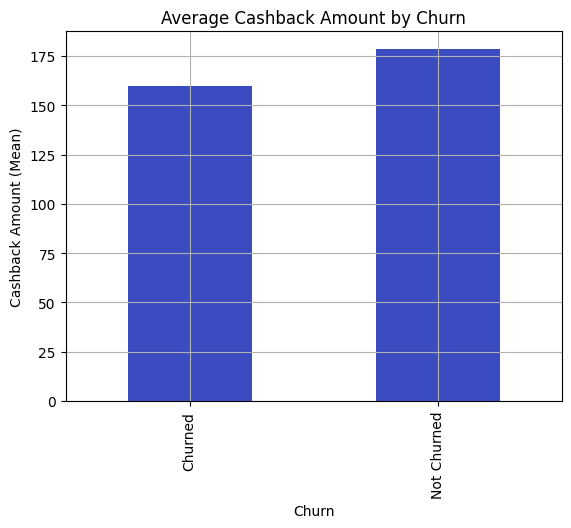

In [31]:
# Grouped bar plot: Average CashbackAmount by Churn
grouped = df.groupby('Churn')['CashbackAmount'].mean()
grouped.plot(kind='bar', colormap='coolwarm')
plt.title("Average Cashback Amount by Churn")
plt.ylabel("Cashback Amount (Mean)")
plt.grid(True)
plt.show()

# **2.6 Relation Plots**

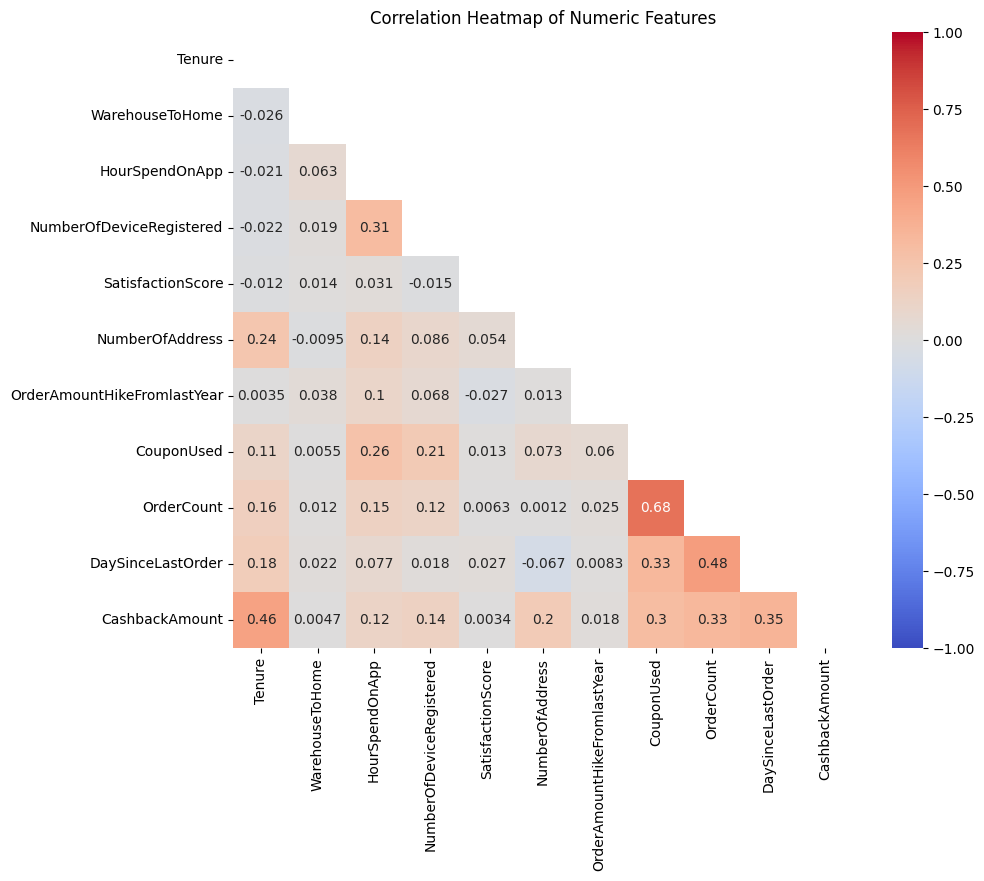

In [32]:
# Assuming 'df' is your DataFrame with the provided structure
# Select numeric columns (excluding CustomerID)

numeric_cols = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, mask=mask)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

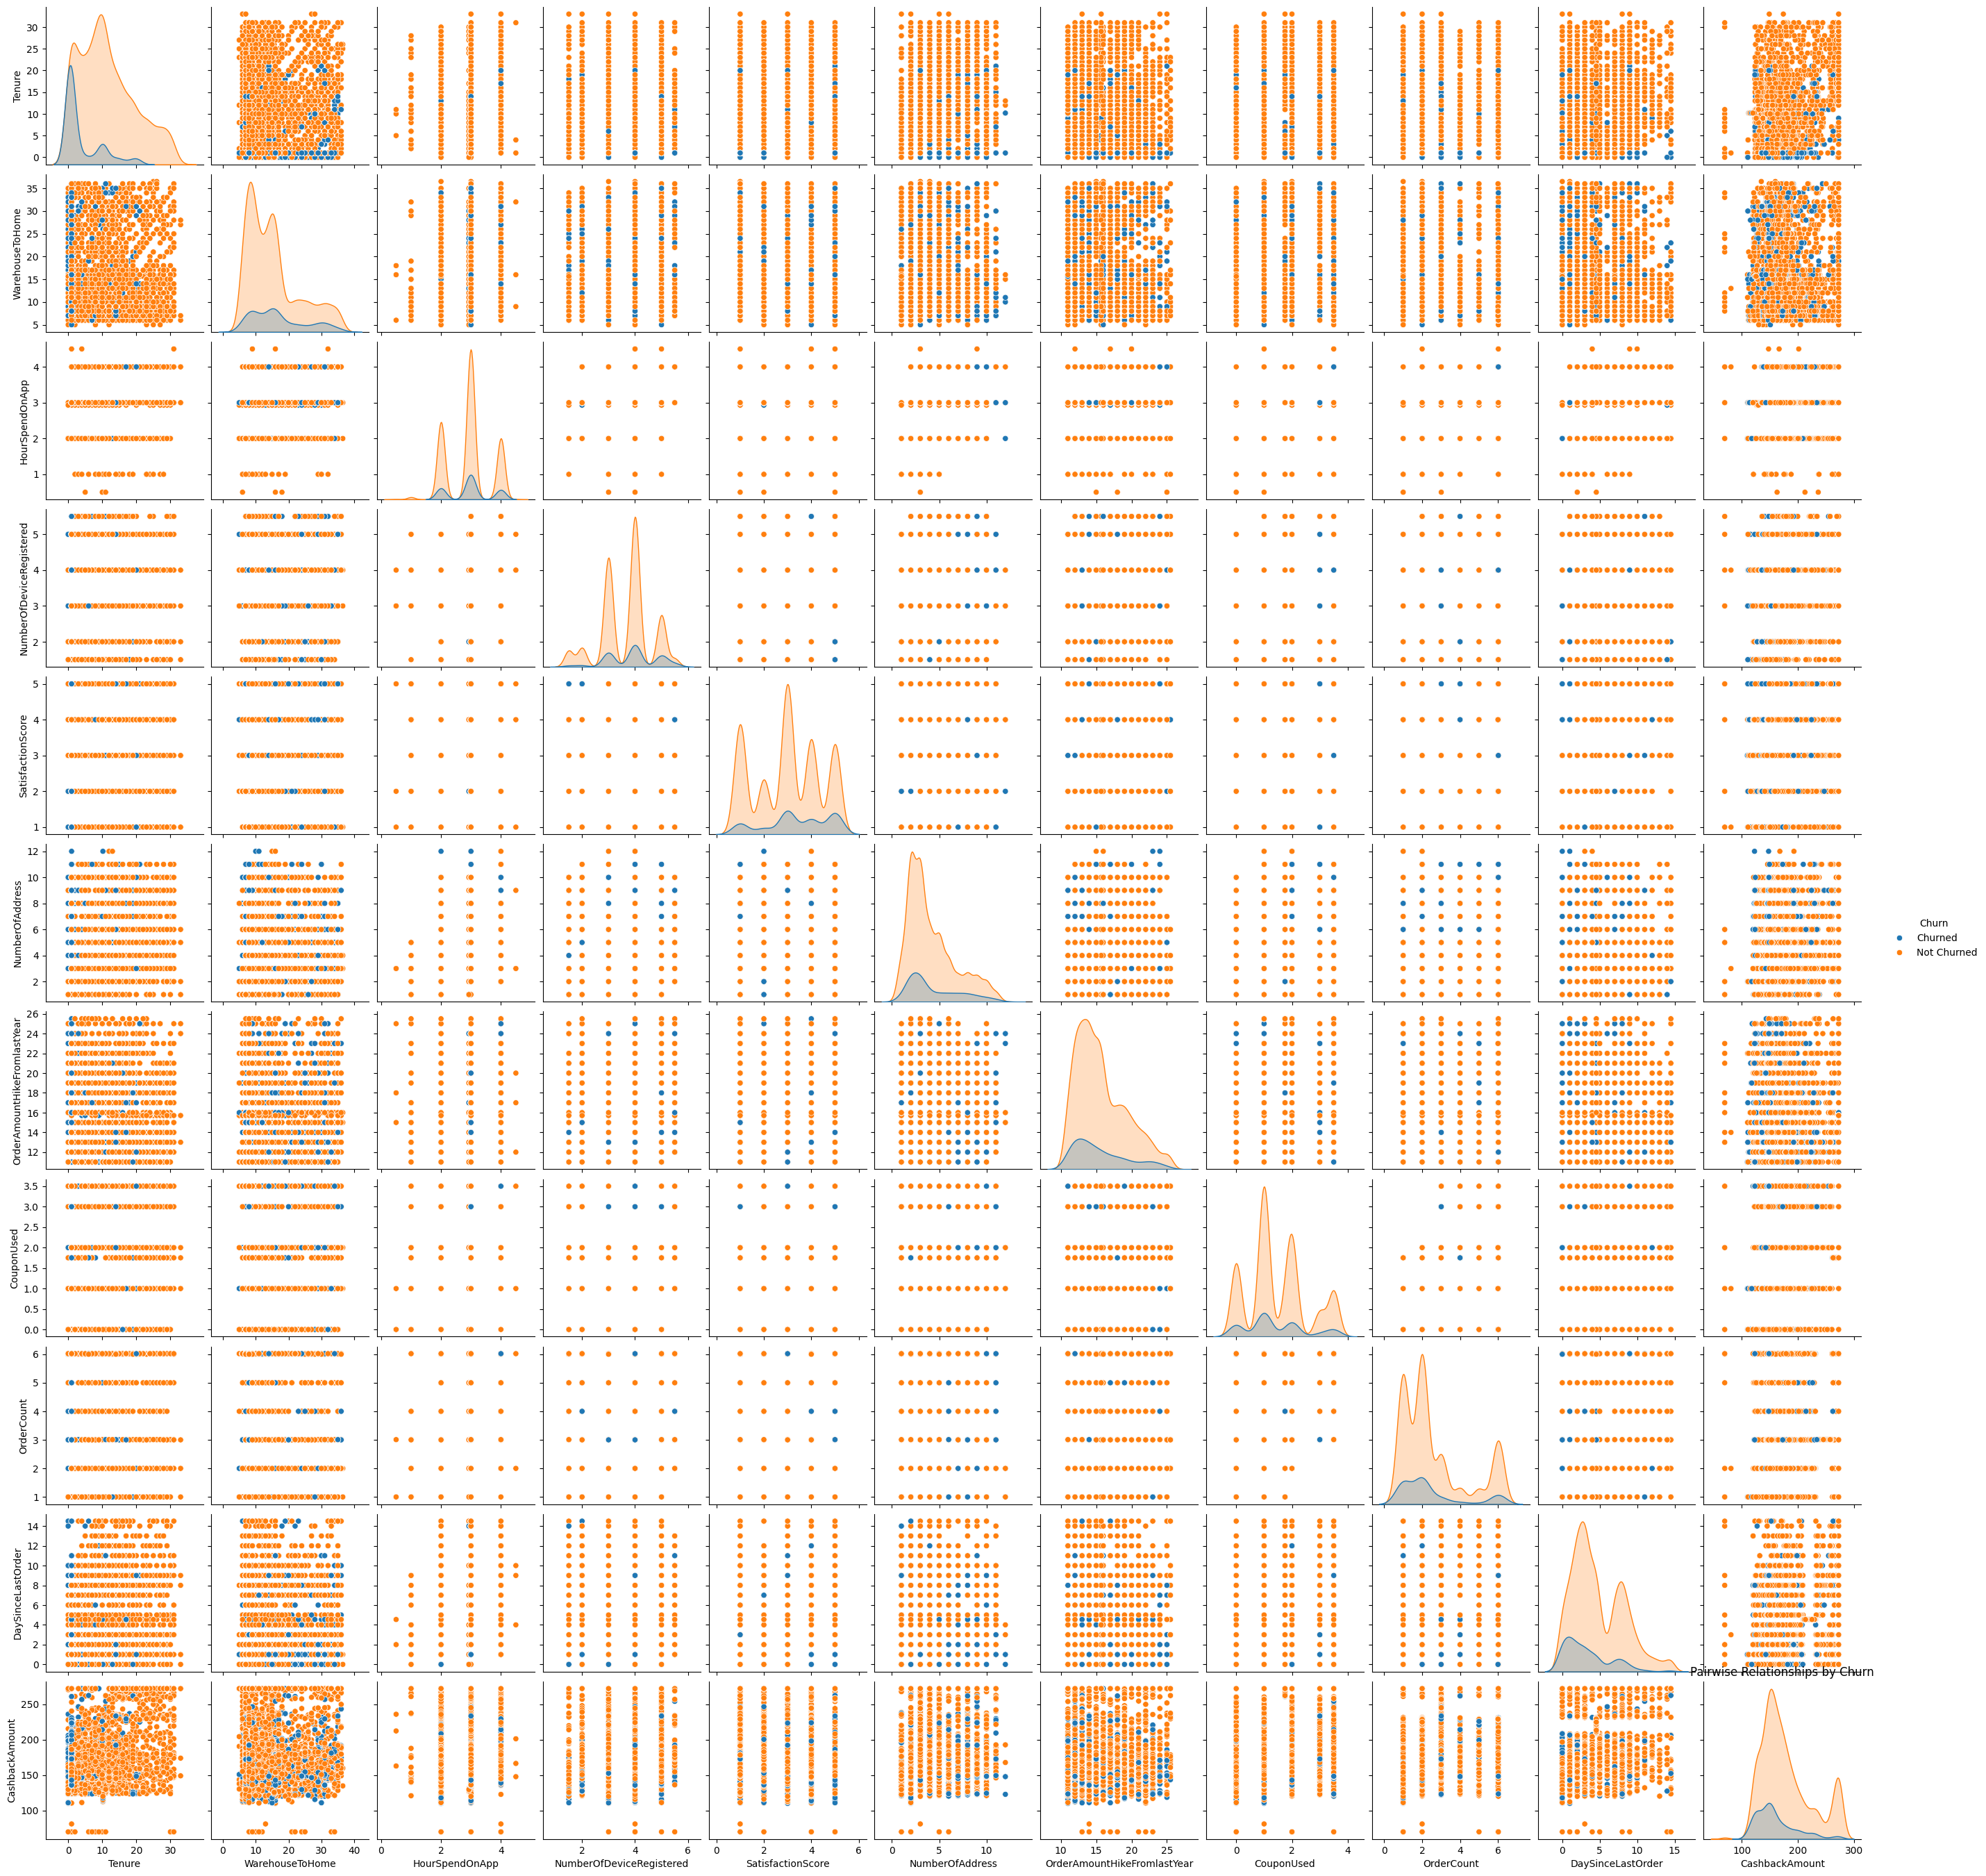

In [35]:
#Pair plot of numerical features by Churn
sns.pairplot(df, hue='Churn', vars=numeric_cols)
plt.title("Pairwise Relationships by Churn")
plt.show()

# **2.7 Churn Ratios**

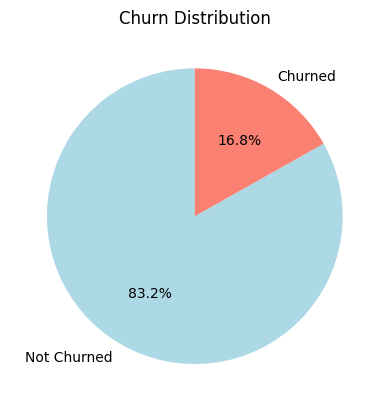

In [36]:
# Pie chart: Churn distribution
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Churn Distribution")
plt.show()

# **2.8 Clustered Heatmap**

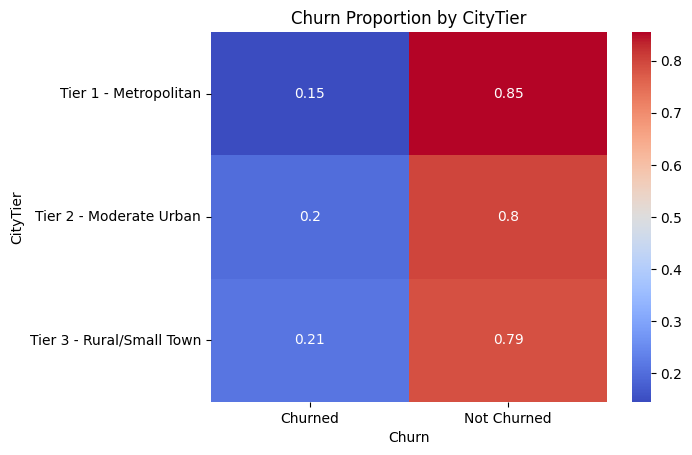

In [37]:
pivot_table = pd.crosstab(df['CityTier'], df['Churn'], normalize='index')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title("Churn Proportion by CityTier")
plt.show()

# **2.9 Bubble Chart**

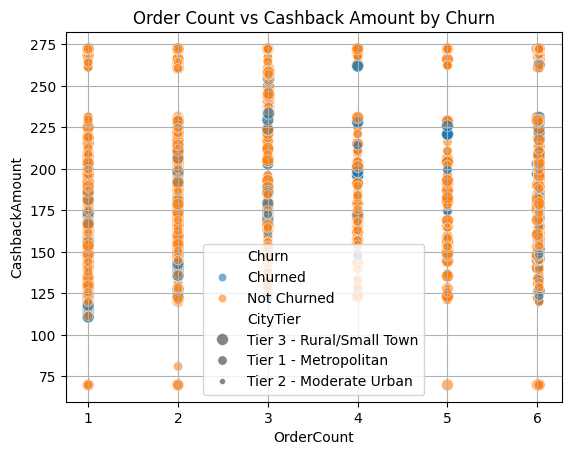

In [38]:
sns.scatterplot(data=df, x='OrderCount', y='CashbackAmount', size='CityTier', hue='Churn', alpha=0.6)
plt.title("Order Count vs Cashback Amount by Churn")
plt.grid(True)
plt.show()

# **2.10 Cohort Analysis**

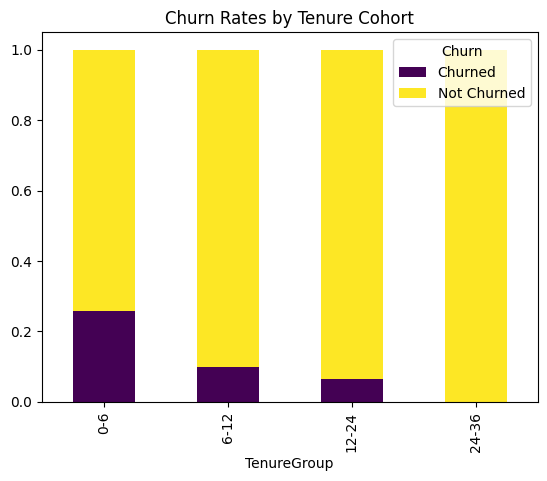

In [39]:
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 6, 12, 24, 36], labels=['0-6', '6-12', '12-24', '24-36'])
churn_rates = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()

churn_rates.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Churn Rates by Tenure Cohort")
plt.show()

# **2.11 Decision Tree Visualization**

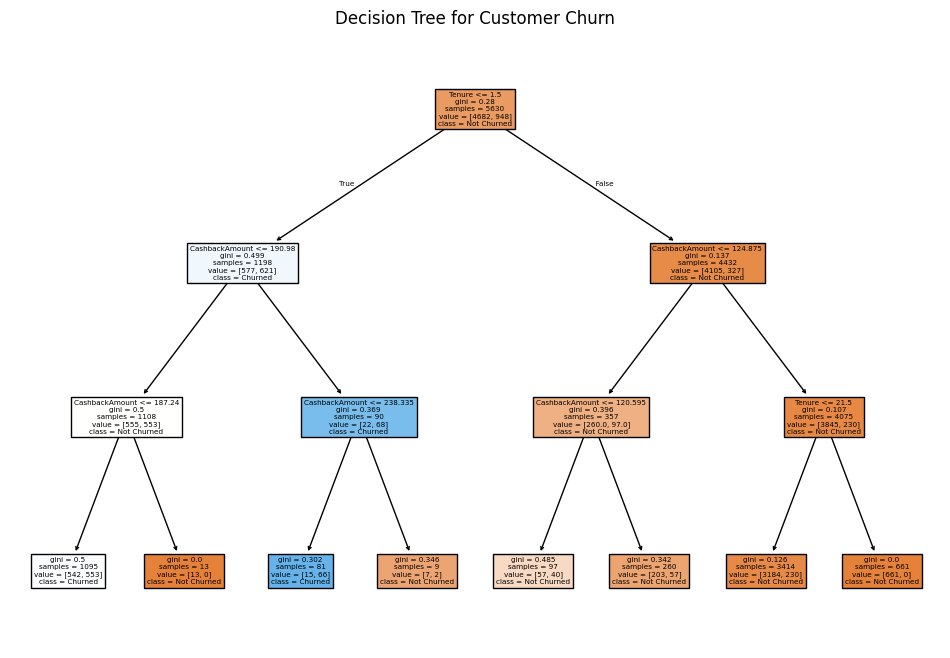

In [40]:
X = df[['Tenure', 'CashbackAmount', 'HourSpendOnApp']]
y = df['Churn'].map({'Churned': 1, 'Not Churned': 0})

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=['Tenure', 'CashbackAmount', 'HourSpendOnApp'], class_names=['Not Churned', 'Churned'], filled=True)
plt.title("Decision Tree for Customer Churn")
plt.show()

# **3.Machine Learning**

## **3.1 Traing Models Before Feature Selection**

**3.1.1 Random Forest**

In [43]:
X = df.drop("Churn", axis=1)   # or your target column
y = df["Churn"]


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming your main dataframe is called df and target column is 'Churn'
# 1. Features & target
X = df.drop('Churn', axis=1)
y = df['Churn']

# (Optional) if y is text labels like "Yes"/"No"
# y = y.map({'Yes': 1, 'No': 0})

# 2. One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# 3. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
rf_preds=rf_model.predict(X_test)
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

     Churned       0.99      0.84      0.91       185
 Not Churned       0.97      1.00      0.98       941

    accuracy                           0.97      1126
   macro avg       0.98      0.92      0.95      1126
weighted avg       0.97      0.97      0.97      1126



**Confusion Matrix**

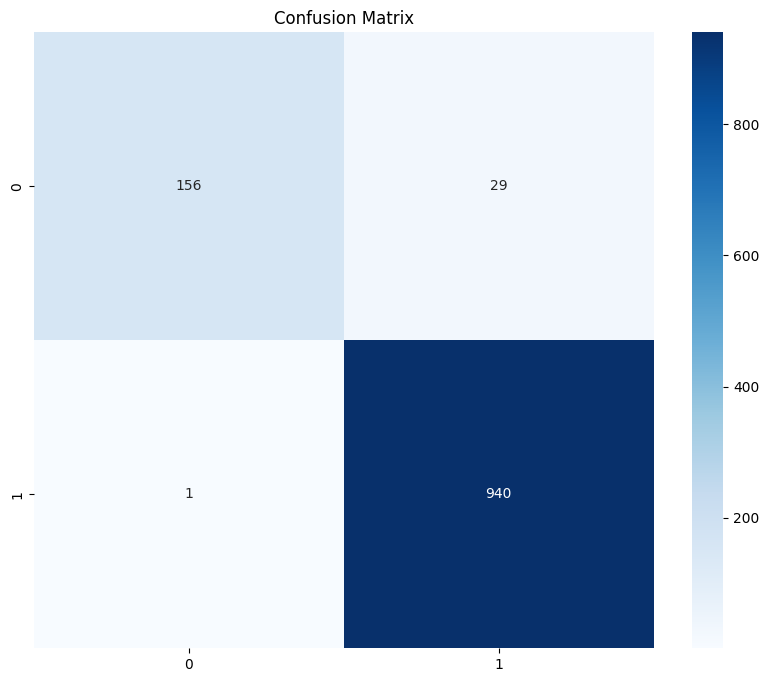

In [52]:
corr=confusion_matrix(y_test,rf_preds)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

**3.1.2 Logistic Regression**

In [53]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [54]:
lr_preds = lr_model.predict(X_test)
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

     Churned       0.84      0.55      0.67       185
 Not Churned       0.92      0.98      0.95       941

    accuracy                           0.91      1126
   macro avg       0.88      0.77      0.81      1126
weighted avg       0.91      0.91      0.90      1126



**Confusion Matrix**

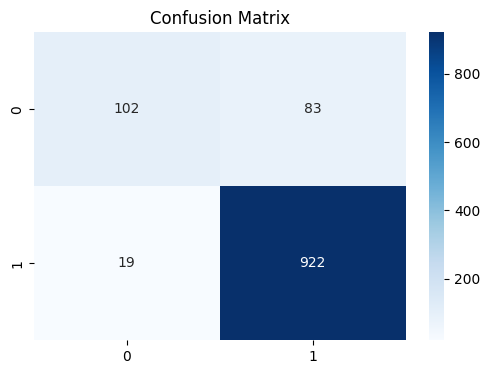

In [55]:
corr=confusion_matrix(y_test,lr_preds)
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

**3.1.3 XGBoost**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming your dataframe is df and target column is 'Churn'
# with values 'Churned' and 'Not Churned'

# 1. Encode target
df['Churn_binary'] = df['Churn'].map({'Not Churned': 0, 'Churned': 1})

# 2. Features and target
X = df.drop(['Churn', 'Churn_binary'], axis=1)   # drop both text and binary target from features
y = df['Churn_binary']

# 3. One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 4. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
xgb_preds = xgb_model.predict(X_test)
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       941
           1       0.97      0.90      0.93       185

    accuracy                           0.98      1126
   macro avg       0.97      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126



**Confusion Matrix**

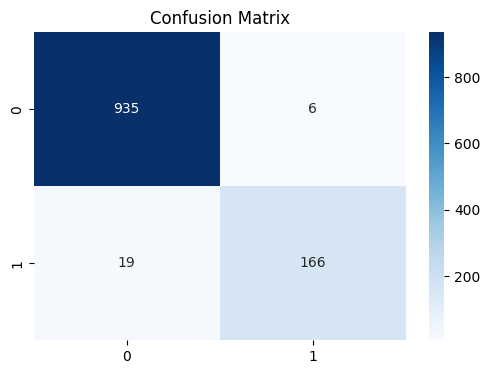

In [60]:
corr=confusion_matrix(y_test,xgb_preds)
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

## **3.2 Training Model With Feature Selection**

## **3.2.1 Feature Selection & Splitting**

In [61]:
# Train Random Forest to calculate feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_
feature_scores = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
Tenure                                   0.188680
CashbackAmount                           0.097487
WarehouseToHome                          0.071041
DaySinceLastOrder                        0.063069
NumberOfAddress                          0.061567
OrderAmountHikeFromlastYear              0.059144
Complain_No Complain                     0.058505
SatisfactionScore                        0.048211
NumberOfDeviceRegistered                 0.035191
OrderCount                               0.028544
CouponUsed                               0.026471
MaritalStatus_Single                     0.023984
HourSpendOnApp                           0.021881
CityTier_Tier 3 - Rural/Small Town       0.018762
Gender_Male                              0.017649
PreferredPaymentMode_Debit Card          0.015446
TenureGroup_12-24                        0.015417
PreferedOrderCat_Laptop & Accessory      0.014999
MaritalStatus_Married                    0.014772
PreferredLoginDevice_Mo

In [62]:
# Set a threshold ( 20% of the highest score)
threshold = 0.2 * feature_scores.max()
selected_features = feature_scores[feature_scores > threshold].index

print("Selected Features Based on Threshold:")
print(selected_features)

Selected Features Based on Threshold:
Index(['Tenure', 'CashbackAmount', 'WarehouseToHome', 'DaySinceLastOrder',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'Complain_No Complain', 'SatisfactionScore'],
      dtype='object')


In [63]:
# Convert selected features into a DataFrame
dff = X[selected_features]

# Print the shape of the new DataFrame to confirm its structure
print("Shape of dff (Selected Features):", dff.shape)

Shape of dff (Selected Features): (5630, 8)


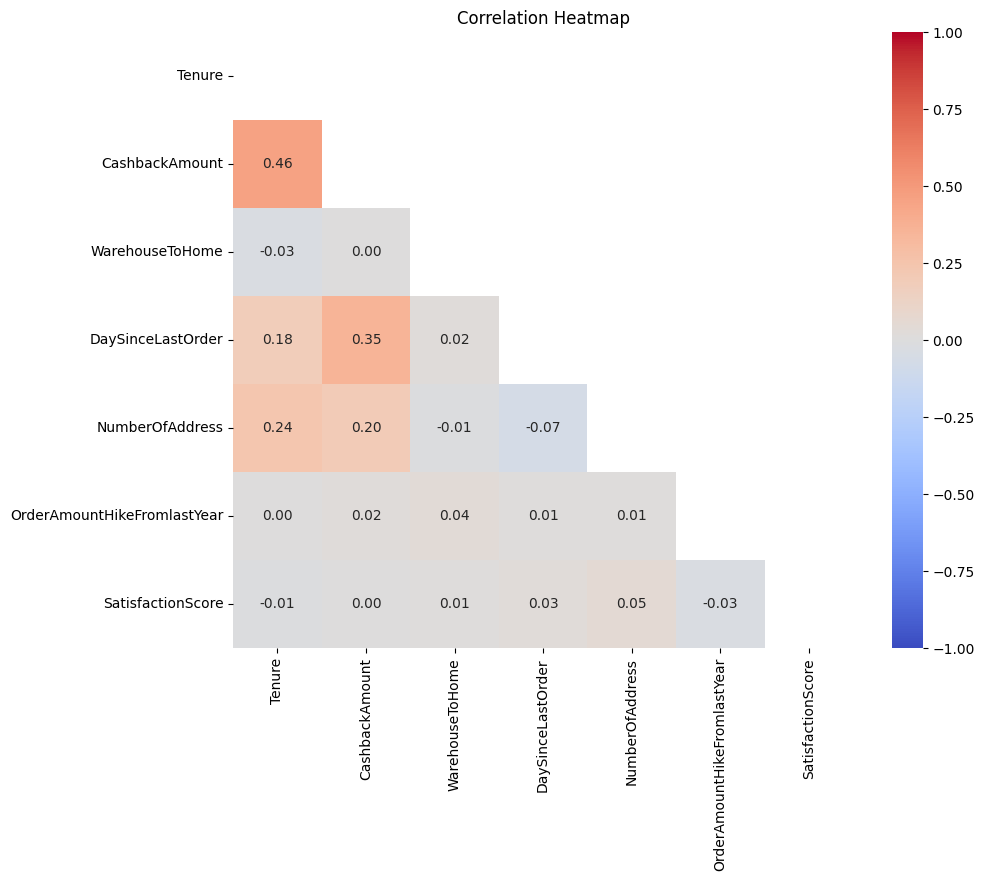

In [64]:
# Select only numerical data
numerical_data = dff.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,mask=mask)
plt.title("Correlation Heatmap")
plt.show()

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dff, y, test_size=0.2, random_state=42)

# Verify the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4504, 8)
X_test shape: (1126, 8)
y_train shape: (4504,)
y_test shape: (1126,)


**3.2.2 Random Forest**

In [67]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
rf_preds = rf_model.predict(X_test)
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       0.98      0.85      0.91       185

    accuracy                           0.97      1126
   macro avg       0.97      0.92      0.95      1126
weighted avg       0.97      0.97      0.97      1126



**Confusion Matrix**

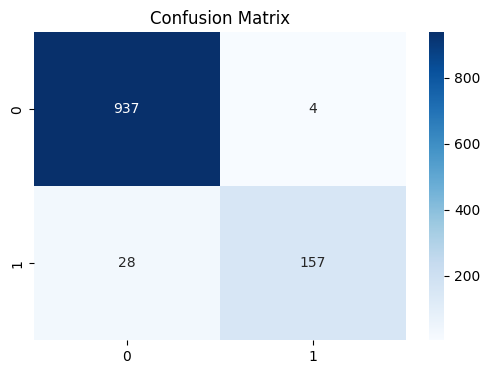

In [69]:
corr=confusion_matrix(y_test,rf_preds)
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

**3.2.3 Logistic Regression**

In [70]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [71]:
lr_preds = lr_model.predict(X_test)
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       941
           1       0.73      0.40      0.52       185

    accuracy                           0.88      1126
   macro avg       0.81      0.69      0.72      1126
weighted avg       0.86      0.88      0.86      1126



**Confusion Matrix**

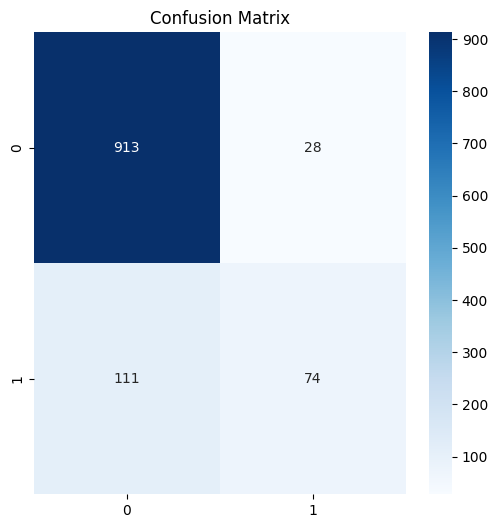

In [72]:
corr=confusion_matrix(y_test,lr_preds)
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

**3.2.4 XGBoost**

In [73]:
# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [74]:
xgb_preds = xgb_model.predict(X_test)
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       941
           1       0.95      0.90      0.92       185

    accuracy                           0.98      1126
   macro avg       0.97      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126



**Confusion Matrix**

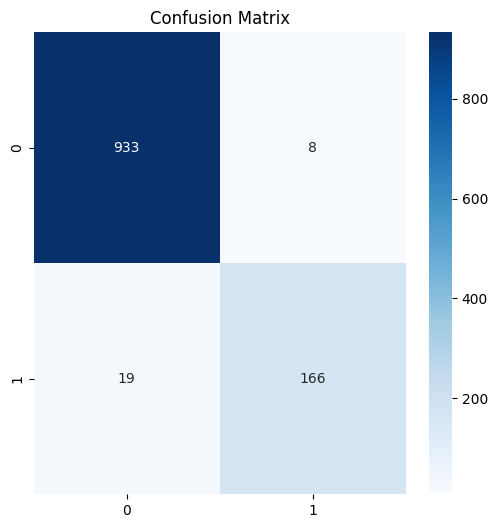

In [75]:
corr=confusion_matrix(y_test,xgb_preds)
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

# **4.Hyper Perimeter Tuning**

### **4.1 Random Forest**

In [76]:
rf = RandomForestClassifier(random_state=42)

In [77]:
# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [78]:
# Grid Search
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Grid Search
f_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)


In [83]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [84]:
print("Best RF Parameters:", rf_grid.best_params_)

Best RF Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [85]:
best_rf = rf_grid.best_estimator_
rf_preds = best_rf.predict(X_test)

**Confusion Matrix**

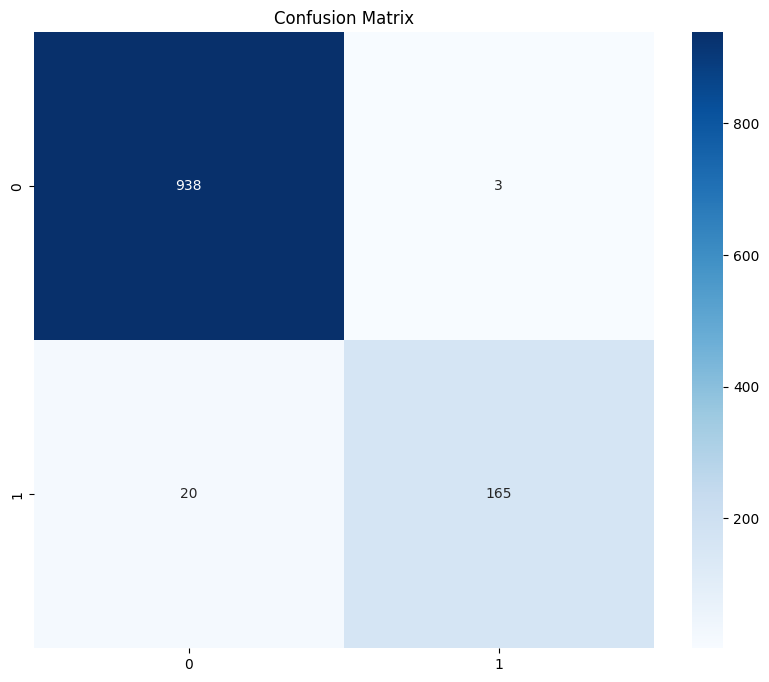

In [86]:
corr=confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

### **4.1.1 Evaluating**

In [87]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.98      0.89      0.93       185

    accuracy                           0.98      1126
   macro avg       0.98      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126



In [88]:
print("ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.9946032110750496


### **4.1.2 Plotting Roc-Curve**

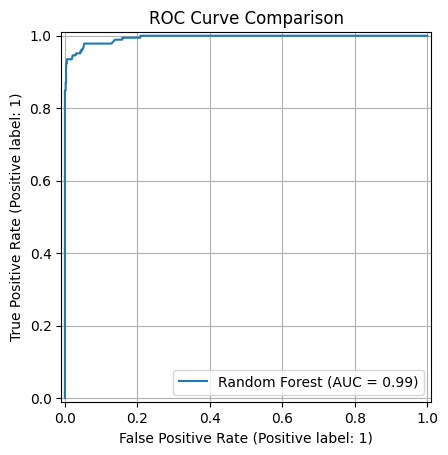

In [89]:
RocCurveDisplay.from_estimator(best_rf, X_test, y_test, name="Random Forest")
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()

## **4.2 XGBoost**

In [90]:
# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [91]:
# Define hyperparameter space
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [92]:
# Random Search for quicker iteration
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid,
                                n_iter=25, cv=5, verbose=2,
                                random_state=42, n_jobs=-1, scoring='accuracy')

In [93]:
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [94]:
print("Best XGB Parameters:", xgb_random.best_params_)

Best XGB Parameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.6}


In [95]:
best_xgb = xgb_random.best_estimator_
xgb_preds = best_xgb.predict(X_test)

**Confusion Matrix**

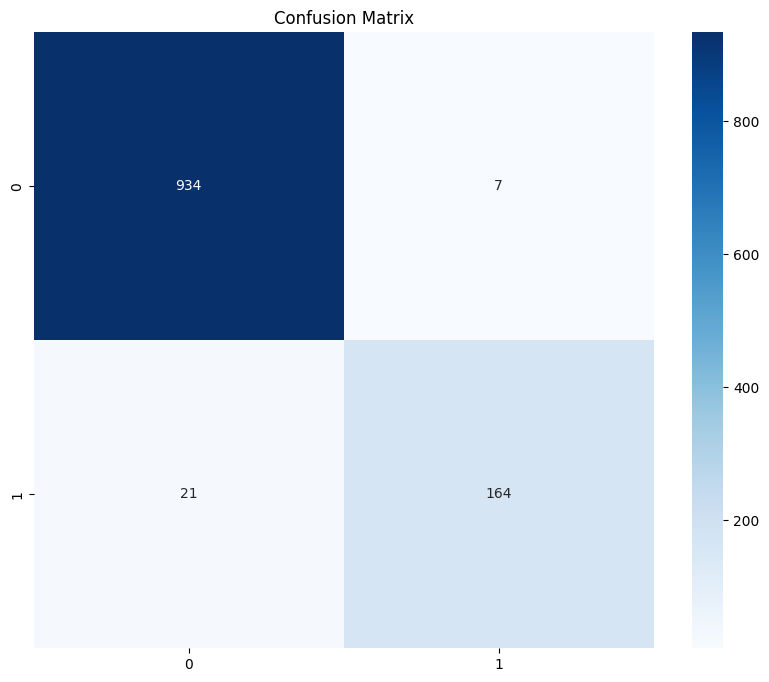

In [96]:
corr=confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

### **4.2.1 Evaluating Model**

In [97]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       941
           1       0.96      0.89      0.92       185

    accuracy                           0.98      1126
   macro avg       0.97      0.94      0.95      1126
weighted avg       0.97      0.98      0.97      1126



In [98]:
print("ROC AUC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.9777292701841055


### **4.2.2 Plotting Roc Curve**

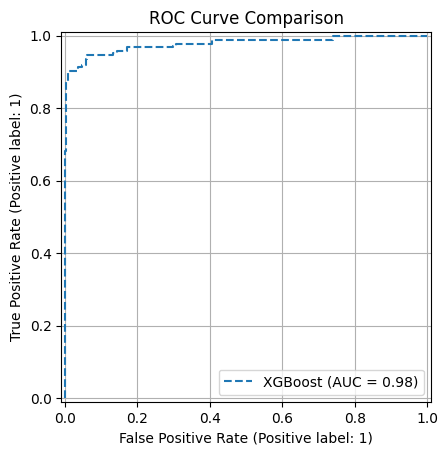

In [99]:
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test, name="XGBoost", linestyle="--")
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()

## **4. Neural Network Model**

### **TensorFlow**

In [4]:
import pandas as pd

df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name="E Comm")
df.head()


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [1]:
# If TensorFlow is not installed, uncomment this line and run once
# !pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [4]:
# ---------------- Load Dataset + Prepare Features + Train/Test Split ----------------

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (must be sheet_name="E Comm")
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name="E Comm")

print("Loaded columns:", df.columns.tolist())

# Ensure target is present
if 'Churn' not in df.columns:
    raise KeyError("ERROR: 'Churn' column not found. Check sheet_name='E Comm'.")

# Create binary target column
if 'Churn_binary' not in df.columns:
    # If Churn is already numeric 0/1
    unique_vals = set(df['Churn'].dropna().unique())
    if unique_vals <= {0, 1}:
        df['Churn_binary'] = df['Churn']
    else:
        df['Churn_binary'] = df['Churn'].map({'Not Churned': 0, 'Churned': 1})

# Features
X = df.drop(['Churn', 'Churn_binary'], axis=1)

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Target
y = df['Churn_binary']

# Final split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)
# -----------------------------------------------------


Loaded columns: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
X_train shape: (4504, 30)
X_test shape : (1126, 30)
y_train shape: (4504,)
y_test shape : (1126,)


In [6]:
# ----------------------- FIXED CELL 2 -----------------------
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset (sheet_name must match your file)
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name="E Comm")

print("Columns in dataset:", df.columns.tolist())

# Ensure target column exists
if "Churn" not in df.columns:
    raise ValueError("ERROR: 'Churn' column not found in dataset. Check sheet_name.")

# Make binary churn column
df["Churn_binary"] = df["Churn"].map({
    "Not Churned": 0,
    "Churned": 1
})

# Drop original churn text
X = df.drop(["Churn", "Churn_binary"], axis=1)
y = df["Churn_binary"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# ------------------------------------------------------------


Columns in dataset: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
X_train shape: (4504, 30)
X_test shape: (1126, 30)
y_train shape: (4504,)
y_test shape: (1126,)


In [11]:
#  DATA → SPLIT → SCALE → CLASS WEIGHTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import json

# 1) Load dataset
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name="E Comm")
print("Columns:", df.columns.tolist())

# 2) Inspect original Churn column
print("\nOriginal 'Churn' value counts (raw):")
print(df["Churn"].value_counts(dropna=False))

# 3) Build Churn_binary robustly
# If Churn is numeric 0/1:
unique_raw = set(df["Churn"].dropna().unique())

if unique_raw <= {0, 1}:
    # already 0/1
    df["Churn_binary"] = df["Churn"].astype(int)
    print("\nDetected numeric churn (0/1). Using it directly as Churn_binary.")
else:
    # assume text labels like 'Churned' / 'Not Churned'
    mapping = {"Not Churned": 0, "Churned": 1}
    df["Churn_binary"] = df["Churn"].map(mapping)
    print("\nDetected text churn. Mapped to 0/1 with", mapping)

print("\nChurn_binary value counts (before dropping NaNs):")
print(df["Churn_binary"].value_counts(dropna=False))

# 4) Drop rows with missing target
df = df.dropna(subset=["Churn_binary"])
df["Churn_binary"] = df["Churn_binary"].astype(int)

print("\nChurn_binary value counts (after dropping NaNs):")
print(df["Churn_binary"].value_counts())

# 5) Build X, y
X = df.drop(["Churn", "Churn_binary"], axis=1)
y = df["Churn_binary"]

# 6) One-hot encode categorical
X = pd.get_dummies(X, drop_first=True)
print("\nFinal feature count after get_dummies:", X.shape[1])

# 7) Train/test split (stratified → keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

print("\ny_train value counts:")
print(y_train.value_counts(dropna=False))

# 8) Impute NaNs in features with median from training
medians = X_train.median()
X_train_clean = X_train.fillna(medians)
X_test_clean  = X_test.fillna(medians)

print("\nNaNs after cleaning (train):", X_train_clean.isna().sum().sum())
print("NaNs after cleaning (test):", X_test_clean.isna().sum().sum())

# 9) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled  = scaler.transform(X_test_clean)

print("\nX_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape :", X_test_scaled.shape)

# 10) Compute class weights safely
classes = np.unique(y_train)
print("\nUnique classes in y_train:", classes)

cw = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight = {int(c): w for c, w in zip(classes, cw)}
print("Class weights:", class_weight)

# 11) Save preprocessing config for TF.js later
feature_names = list(X_train_clean.columns)
means = scaler.mean_.tolist()
stds = scaler.scale_.tolist()

config = {
    "feature_names": feature_names,
    "means": means,
    "stds": stds
}

with open("preprocessing_config.json", "w") as f:
    json.dump(config, f)

print("\nSaved preprocessing_config.json with feature names & scaling info.")
# ==========================================================


Columns: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Original 'Churn' value counts (raw):
Churn
0    4682
1     948
Name: count, dtype: int64

Detected numeric churn (0/1). Using it directly as Churn_binary.

Churn_binary value counts (before dropping NaNs):
Churn_binary
0    4682
1     948
Name: count, dtype: int64

Churn_binary value counts (after dropping NaNs):
Churn_binary
0    4682
1     948
Name: count, dtype: int64

Final feature count after get_dummies: 30

Shapes:
X_train: (4504, 30)
X_test : (1126, 30)
y_train: (4504,)
y_test : (1126,)

y_train value counts:
Churn_binary
0    3746
1     758
Name: count, dtype: int64

NaNs after cleaning (train): 0
NaNs after cleaning 

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

input_dim = X_train_scaled.shape[1]
print("Input dim:", input_dim)

model_improved = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_improved.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_improved.summary()


Input dim: 30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_improved = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

history_improved = model_improved.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=64,
    callbacks=[early_stop_improved],
    class_weight=class_weight,
    verbose=1
)


Epoch 1/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2823 - loss: 0.7107 - val_accuracy: 0.5472 - val_loss: 0.6970
Epoch 2/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5099 - loss: 0.6713 - val_accuracy: 0.6693 - val_loss: 0.6554
Epoch 3/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6036 - loss: 0.6113 - val_accuracy: 0.7259 - val_loss: 0.6010
Epoch 4/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6727 - loss: 0.5741 - val_accuracy: 0.7536 - val_loss: 0.5433
Epoch 5/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7433 - loss: 0.5316 - val_accuracy: 0.7958 - val_loss: 0.4858
Epoch 6/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7515 - loss: 0.5057 - val_accuracy: 0.8335 - val_loss: 0.4193
Epoch 7/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8036 - loss: 0.4805 - val_accuracy: 0.8135 - val_loss: 0.4479
Epoch 8/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7900 - loss: 0.4761 - val_accuracy: 0.8202 - val_lo

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
NaNs in predicted probabilities: 0
Test Accuracy (Improved NN): 0.8961
ROC-AUC (Improved NN): 0.9511

Classification Report (Improved NN):
              precision    recall  f1-score   support

 Not Churned       0.97      0.90      0.93       936
     Churned       0.64      0.88      0.74       190

    accuracy                           0.90      1126
   macro avg       0.81      0.89      0.84      1126
weighted avg       0.92      0.90      0.90      1126



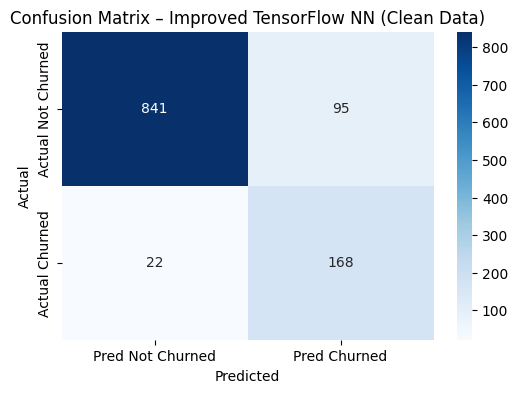

In [17]:
#  Evaluate improved NN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_prob_nn_imp = model_improved.predict(X_test_scaled).ravel()

print("NaNs in predicted probabilities:", np.isnan(y_prob_nn_imp).sum())

y_pred_nn_imp = (y_prob_nn_imp >= 0.5).astype(int)

acc_imp = accuracy_score(y_test, y_pred_nn_imp)
auc_imp = roc_auc_score(y_test, y_prob_nn_imp)

print(f"Test Accuracy (Improved NN): {acc_imp:.4f}")
print(f"ROC-AUC (Improved NN): {auc_imp:.4f}\n")

print("Classification Report (Improved NN):")
print(classification_report(
    y_test, y_pred_nn_imp,
    target_names=['Not Churned', 'Churned']
))

cm_imp = confusion_matrix(y_test, y_pred_nn_imp)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_imp,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred Not Churned', 'Pred Churned'],
    yticklabels=['Actual Not Churned', 'Actual Churned']
)
plt.title('Confusion Matrix – Improved TensorFlow NN (Clean Data)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [14]:
!pip install tensorflowjs

import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model_improved, "tfjs_model")
print("Saved TF.js model to folder: tfjs_model")


failed to lookup keras version from the file,
    this is likely a weight only file
Saved TF.js model to folder: tfjs_model


### **Build the final Keras model**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

input_dim = X_train_scaled.shape[1]
print("Input dim:", input_dim)

model_improved = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # probability of churn
])

model_improved.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_improved.summary()


Input dim: 30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Train the model**

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_improved = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

history_improved = model_improved.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=80,
    batch_size=64,
    callbacks=[early_stop_improved],
    class_weight=class_weight,
    verbose=1
)


Epoch 1/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5205 - loss: 0.7196 - val_accuracy: 0.5827 - val_loss: 0.6689
Epoch 2/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5956 - loss: 0.6487 - val_accuracy: 0.6337 - val_loss: 0.6265
Epoch 3/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6429 - loss: 0.6116 - val_accuracy: 0.6959 - val_loss: 0.5724
Epoch 4/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6765 - loss: 0.5802 - val_accuracy: 0.7658 - val_loss: 0.5189
Epoch 5/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7285 - loss: 0.5321 - val_accuracy: 0.7902 - val_loss: 0.4808
Epoch 6/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7576 - loss: 0.4812 - val_accuracy: 0.8013 - val_loss: 0.4553
Epoch 7/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7540 - loss: 0.4813 - val_accuracy: 0.8102 - val_loss: 0.4379
Epoch 8/80
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7751 - loss: 0.4987 - val_accuracy: 0.8058 - val_

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_prob_nn_imp = model_improved.predict(X_test_scaled).ravel()
y_pred_nn_imp = (y_prob_nn_imp >= 0.5).astype(int)

acc_imp = accuracy_score(y_test, y_pred_nn_imp)
auc_imp = roc_auc_score(y_test, y_prob_nn_imp)

print(f"Test Accuracy (Improved NN): {acc_imp:.4f}")
print(f"ROC-AUC (Improved NN): {auc_imp:.4f}\n")

print("Classification Report (Improved NN):")
print(classification_report(
    y_test, y_pred_nn_imp,
    target_names=['Not Churned', 'Churned']
))


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy (Improved NN): 0.8774
ROC-AUC (Improved NN): 0.9448

Classification Report (Improved NN):
              precision    recall  f1-score   support

 Not Churned       0.97      0.88      0.92       936
     Churned       0.59      0.86      0.70       190

    accuracy                           0.88      1126
   macro avg       0.78      0.87      0.81      1126
weighted avg       0.91      0.88      0.89      1126



In [21]:
!pip install tensorflowjs

import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model_improved, "tfjs_model")

print("Saved TF.js model to folder: tfjs_model")


failed to lookup keras version from the file,
    this is likely a weight only file
Saved TF.js model to folder: tfjs_model
